## Урок 9. Линейная регрессия Логистическая регрессия

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

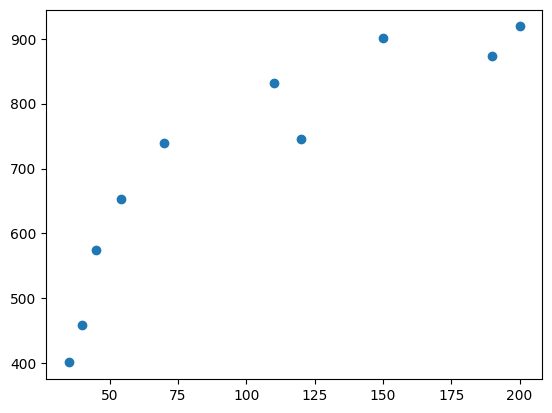

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

plt.scatter(zp,ks)

график линейного вида
ks = a+b*zp

In [77]:
b=(np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b

2.620538882402765

In [78]:
## тогда a будет равно
a=np.mean(ks)-b*np.mean(zp)
a

444.1773573243596

Поставим значения в уравнение

In [79]:
ks1 = a + b*zp
ks1

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

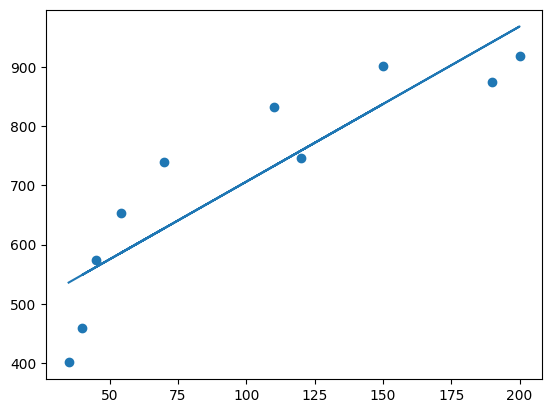

In [80]:
plt.scatter(zp, ks)
plt.plot(zp, a + b*zp)
plt.show()

In [81]:
mse = np.sum((ks - ks1) ** 2 / len(zp))
mse

6470.414201176659

### с использованием intercept

In [82]:
zp = np.vstack([np.ones((1, len(zp))), zp])
np.dot(np.dot(np.linalg.inv(np.dot(zp, zp.T)), zp), ks.T)

array([444.17735732,   2.62053888])

### без использования intercept

Если по какой-то причине мы хотим построить модель без интерсепта, тогда просто не добавляем столбец единиц.

ks = b*zp

In [83]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
ks=ks.reshape((-1,1))
ks

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [84]:
zp=zp.reshape((-1,1))
zp

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [85]:
B=np.dot(np.linalg.inv(np.dot(zp.T,zp)),np.dot(zp.T,ks))
B

array([[5.88982042]])

In [86]:
mse = np.sum(((B * zp) - ks) ** 2 / len(ks))
mse

56516.85841571941

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [87]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
def mse_(B1, y=ks, x= zp, n= len(zp)):
    return np.sum((B1 * x - y) **2)/n
alpha = 1e-6
B1 = 1
n= len(zp)
for i in range(5000):
    B1 -= alpha * (2/n) * np.sum((B1 * zp - ks) * zp)
    if i % 500 == 0:
        print('Iteration = {i}, B1 = {B1}, mse = {mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration = 0, B1 = 1.1347302, mse = 368017.9491755833
Iteration = 500, B1 = 5.8898163455368975, mse = 56516.85841594815
Iteration = 1000, B1 = 5.8898204201291975, mse = 56516.8584157194
Iteration = 1500, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 2000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 2500, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 3000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 3500, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 4000, B1 = 5.889820420132673, mse = 56516.85841571943
Iteration = 4500, B1 = 5.889820420132673, mse = 56516.85841571943


3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [88]:
X1 = zp 
Y1 = ks 

In [92]:
def mse(B1, B0, X1, Y1, n):
    return np.sum((B0 + B1 * X1 - Y1)) ** 2 / n
alpha = 1e-5 #скорость обучения
B0 = 444 ## a = 444.17
B1 = 2.5  ## b = 2.62
n = len(X1)
for i in range(10 ** 6):
    B1 -= alpha * (2/n) * np.sum((B0 + B1 * X1 - Y1) * X1)
    B0 -= alpha * (2/n) * np.sum((B0 + B1 * X1 - Y1))
    if i % 50000 == 0:
        print(B1, B0, mse(B1, B0, X1, Y1, n))

2.533572 444.000179915984 809.2116630296061
2.621548125450926 444.0402401470639 0.012096436846860206
2.621322013627026 444.0709600168741 0.0072834142146240306
2.621146560122768 444.0947973762636 0.004385433768459587
2.6210104153974134 444.1132941897699 0.0026405239040000615
2.620904772672728 444.1276469586467 0.0015898920960467204
2.6208227982499563 444.13878411879995 0.0009572936921034088
2.62075918945909 444.1474260984209 0.0005763983705794767
2.6207098316454167 444.15413192027484 0.0003470565868979623
2.6206715320057956 444.1593353630788 0.00020896706284354946
2.620641813055802 444.1633730213443 0.00012582165271053913
2.6206187523692006 444.1665060785985 7.575877315582256e-05
2.6206008582218527 444.1689372025769 4.561529413924481e-05
2.6205869730972307 444.1708236551 2.746553268983038e-05
2.620576198809845 444.1722874649091 1.6537336877447512e-05
2.620567838404601 444.1734233213018 9.957335037609506e-06
2.62056135107292 444.17430469929093 5.995434555526335e-06
2.6205563171695494 444